# Data Validation & Quality Checks
## E-Commerce Supply Chain Analytics

This notebook performs comprehensive data validation including:
- Data loading and structure analysis
- Missing value detection
- Duplicate checking
- Referential integrity validation
- Data quality assessment

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Data

In [3]:
# Define data path (using train data)
data_path = "../data/raw/train"

# CSV files to load
csv_files = {
    'customers': 'df_Customers.csv',
    'products': 'df_Products.csv',
    'orders': 'df_Orders.csv',
    'order_items': 'df_OrderItems.csv',
    'payments': 'df_Payments.csv'
}

# Load all datasets
data = {}
print("="*60)
print("LOADING DATA")
print("="*60)

for name, filename in csv_files.items():
    filepath = os.path.join(data_path, filename)
    try:
        df = pd.read_csv(filepath)
        data[name] = df
        print(f"✓ {name.upper()}: {df.shape[0]:,} rows × {df.shape[1]} columns")
    except FileNotFoundError:
        print(f"✗ {name.upper()}: FILE NOT FOUND")

print(f"\nSuccessfully loaded {len(data)} datasets")

LOADING DATA
✓ CUSTOMERS: 89,316 rows × 4 columns
✓ PRODUCTS: 89,316 rows × 6 columns
✓ ORDERS: 89,316 rows × 7 columns
✓ ORDER_ITEMS: 89,316 rows × 5 columns
✓ PAYMENTS: 89,316 rows × 5 columns

Successfully loaded 5 datasets


## 2. Data Structure Overview

In [4]:
# Display structure for each dataset
for name, df in data.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {', '.join(df.columns.tolist())}")
    print(f"\nFirst 3 rows:")
    display(df.head(3))


CUSTOMERS
Shape: (89316, 4)
Columns: customer_id, customer_zip_code_prefix, customer_city, customer_state

First 3 rows:


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP



PRODUCTS
Shape: (89316, 6)
Columns: product_id, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm

First 3 rows:


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0



ORDERS
Shape: (89316, 7)
Columns: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date

First 3 rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08



ORDER_ITEMS
Shape: (89316, 5)
Columns: order_id, product_id, seller_id, price, shipping_charges

First 3 rows:


,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38



PAYMENTS
Shape: (89316, 5)
Columns: order_id, payment_sequential, payment_type, payment_installments, payment_value

First 3 rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25


## 3. Missing Values Analysis

In [5]:
# Check missing values for all datasets
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

for name, df in data.items():
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing': missing.values,
        'Percentage': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)
    
    print(f"\n{name.upper()}:")
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
    else:
        print("  ✓ No missing values")

MISSING VALUES ANALYSIS

CUSTOMERS:
  ✓ No missing values

PRODUCTS:
               Column  Missing  Percentage
product_category_name      308        0.34
     product_weight_g       15        0.02
    product_length_cm       15        0.02
    product_height_cm       15        0.02
     product_width_cm       15        0.02

ORDERS:
                   Column  Missing  Percentage
order_delivered_timestamp     1889        2.11
        order_approved_at        9        0.01

ORDER_ITEMS:
  ✓ No missing values

PAYMENTS:
  ✓ No missing values


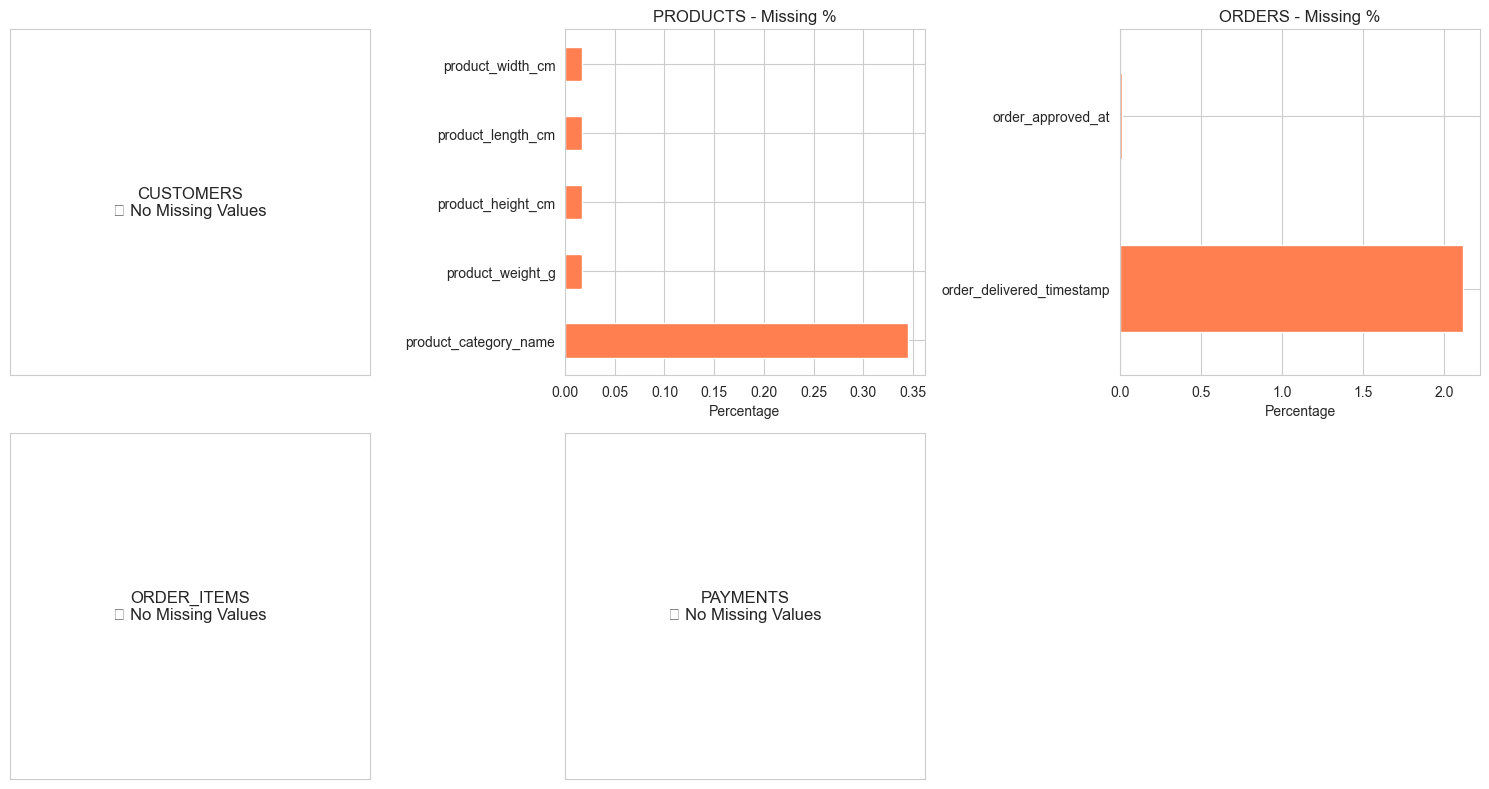

In [6]:
# Visualize missing values
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, df) in enumerate(data.items()):
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_pct = missing_pct[missing_pct > 0]
    
    if len(missing_pct) > 0:
        missing_pct.plot(kind='barh', ax=axes[idx], color='coral')
        axes[idx].set_title(f'{name.upper()} - Missing %')
        axes[idx].set_xlabel('Percentage')
    else:
        axes[idx].text(0.5, 0.5, f'{name.upper()}\n✓ No Missing Values', 
                      ha='center', va='center', fontsize=12)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

# Hide last subplot if not needed
if len(data) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.savefig('../results/figures/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Duplicate Detection

In [7]:
# Check for duplicates
print("="*60)
print("DUPLICATE DETECTION")
print("="*60)

duplicate_summary = []

for name, df in data.items():
    duplicates = df.duplicated().sum()
    duplicate_pct = (duplicates / len(df) * 100).round(2)
    
    duplicate_summary.append({
        'Dataset': name.upper(),
        'Duplicates': duplicates,
        'Percentage': f"{duplicate_pct}%"
    })
    
    if duplicates > 0:
        print(f"\n⚠ {name.upper()}: {duplicates:,} duplicates ({duplicate_pct}%)")
    else:
        print(f"\n✓ {name.upper()}: No duplicates")

# Summary table
print(f"\n{'='*60}")
print("SUMMARY")
print(f"{'='*60}")
display(pd.DataFrame(duplicate_summary))

DUPLICATE DETECTION

✓ CUSTOMERS: No duplicates

⚠ PRODUCTS: 61,865 duplicates (69.27%)

✓ ORDERS: No duplicates

✓ ORDER_ITEMS: No duplicates

✓ PAYMENTS: No duplicates

SUMMARY


,Dataset,Duplicates,Percentage
0,CUSTOMERS,0,0.0%
1,PRODUCTS,61865,69.27%
2,ORDERS,0,0.0%
3,ORDER_ITEMS,0,0.0%
4,PAYMENTS,0,0.0%


## 5. Referential Integrity Checks

In [8]:
# Validate foreign key relationships
print("="*60)
print("REFERENTIAL INTEGRITY VALIDATION")
print("="*60)

integrity_results = []

# 1. Orders.customer_id -> Customers.customer_id
if 'orders' in data and 'customers' in data:
    customer_ids_in_orders = set(data['orders']['customer_id'].unique())
    customer_ids = set(data['customers']['customer_id'].unique())
    orphaned = customer_ids_in_orders - customer_ids
    
    status = "PASS" if len(orphaned) == 0 else "FAIL"
    integrity_results.append({
        'Check': 'Orders → Customers',
        'Status': status,
        'Orphaned': len(orphaned)
    })
    print(f"\n1. Orders.customer_id → Customers.customer_id: {status}")
    if len(orphaned) > 0:
        print(f"   ⚠ {len(orphaned)} orphaned customer IDs")

# 2. OrderItems.order_id -> Orders.order_id
if 'order_items' in data and 'orders' in data:
    order_ids_in_items = set(data['order_items']['order_id'].unique())
    order_ids = set(data['orders']['order_id'].unique())
    orphaned = order_ids_in_items - order_ids
    
    status = "PASS" if len(orphaned) == 0 else "FAIL"
    integrity_results.append({
        'Check': 'OrderItems → Orders',
        'Status': status,
        'Orphaned': len(orphaned)
    })
    print(f"\n2. OrderItems.order_id → Orders.order_id: {status}")
    if len(orphaned) > 0:
        print(f"   ⚠ {len(orphaned)} orphaned order IDs")

# 3. OrderItems.product_id -> Products.product_id
if 'order_items' in data and 'products' in data:
    product_ids_in_items = set(data['order_items']['product_id'].unique())
    product_ids = set(data['products']['product_id'].unique())
    orphaned = product_ids_in_items - product_ids
    
    status = "PASS" if len(orphaned) == 0 else "FAIL"
    integrity_results.append({
        'Check': 'OrderItems → Products',
        'Status': status,
        'Orphaned': len(orphaned)
    })
    print(f"\n3. OrderItems.product_id → Products.product_id: {status}")
    if len(orphaned) > 0:
        print(f"   ⚠ {len(orphaned)} orphaned product IDs")

# 4. Payments.order_id -> Orders.order_id
if 'payments' in data and 'orders' in data:
    order_ids_in_payments = set(data['payments']['order_id'].unique())
    order_ids = set(data['orders']['order_id'].unique())
    orphaned = order_ids_in_payments - order_ids
    
    status = "PASS" if len(orphaned) == 0 else "FAIL"
    integrity_results.append({
        'Check': 'Payments → Orders',
        'Status': status,
        'Orphaned': len(orphaned)
    })
    print(f"\n4. Payments.order_id → Orders.order_id: {status}")
    if len(orphaned) > 0:
        print(f"   ⚠ {len(orphaned)} orphaned order IDs")

# Summary
print(f"\n{'='*60}")
print("SUMMARY")
print(f"{'='*60}")
display(pd.DataFrame(integrity_results))

REFERENTIAL INTEGRITY VALIDATION

1. Orders.customer_id → Customers.customer_id: PASS

2. OrderItems.order_id → Orders.order_id: PASS

3. OrderItems.product_id → Products.product_id: PASS

4. Payments.order_id → Orders.order_id: PASS

SUMMARY


,Check,Status,Orphaned
0,Orders → Customers,PASS,0
1,OrderItems → Orders,PASS,0
2,OrderItems → Products,PASS,0
3,Payments → Orders,PASS,0


## 6. Data Quality Summary

In [9]:
# Generate comprehensive quality report
print("="*60)
print("DATA QUALITY SUMMARY")
print("="*60)

quality_summary = []

for name, df in data.items():
    missing_count = df.isnull().sum().sum()
    duplicate_count = df.duplicated().sum()
    
    quality_summary.append({
        'Dataset': name.upper(),
        'Rows': f"{len(df):,}",
        'Columns': len(df.columns),
        'Missing Values': missing_count,
        'Duplicates': duplicate_count,
        'Memory (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
    })

quality_df = pd.DataFrame(quality_summary)
display(quality_df)

print(f"\n{'='*60}")
print("KEY FINDINGS")
print(f"{'='*60}")
print(f"✓ Total Records: {sum(len(df) for df in data.values()):,}")
print(f"✓ Total Columns: {sum(len(df.columns) for df in data.values())}")
print(f"✓ Referential Integrity: {sum(1 for r in integrity_results if r['Status']=='PASS')}/{len(integrity_results)} checks PASSED")
print(f"\n✓ Data quality validation complete!")

DATA QUALITY SUMMARY


,Dataset,Rows,Columns,Missing Values,Duplicates,Memory (MB)
0,CUSTOMERS,"89,316",4,0,0,15.27
1,PRODUCTS,"89,316",6,368,61865,12.63
2,ORDERS,"89,316",7,1898,0,37.67
3,ORDER_ITEMS,"89,316",5,0,0,16.95
4,PAYMENTS,"89,316",5,0,0,12.25



KEY FINDINGS
✓ Total Records: 446,580
✓ Total Columns: 27
✓ Referential Integrity: 4/4 checks PASSED

✓ Data quality validation complete!


## 7. Basic Statistics

In [10]:
# Display basic statistics for numerical columns
for name, df in data.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        print(f"\n{'='*60}")
        print(f"{name.upper()} - Numerical Statistics")
        print(f"{'='*60}")
        display(df[numeric_cols].describe().round(2))


CUSTOMERS - Numerical Statistics


,customer_zip_code_prefix
count,89316.00
mean,40499.47
std,31194.39
min,1003.00
25%,9785.00
50%,35480.00
75%,70040.00
max,99990.00



PRODUCTS - Numerical Statistics


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,89301.00,89301.00,89301.00,89301.00
mean,2087.07,30.22,16.56,23.03
std,3747.04,16.11,13.39,11.69
min,0.00,7.00,2.00,6.00
25%,300.00,18.00,8.00,15.00
50%,700.00,25.00,13.00,20.00
75%,1800.00,38.00,20.00,30.00
max,40425.00,105.00,105.00,118.00



ORDER_ITEMS - Numerical Statistics


,price,shipping_charges
count,89316.00,89316.00
mean,340.90,44.28
std,557.46,37.67
min,0.85,0.00
25%,59.65,20.11
50%,136.90,35.06
75%,399.20,57.19
max,6735.00,409.68



PAYMENTS - Numerical Statistics


,payment_sequential,payment_installments,payment_value
count,89316.00,89316.00,89316.00
mean,1.10,2.97,268.66
std,0.77,2.80,344.41
min,1.00,0.00,0.00
25%,1.00,1.00,84.34
50%,1.00,2.00,171.86
75%,1.00,4.00,313.53
max,29.00,24.00,7274.88


## Conclusion

### Validation Results:
- ✓ All datasets loaded successfully
- ✓ Missing values identified and documented
- ✓ Duplicate records detected
- ✓ Referential integrity validated
- ✓ Data quality metrics calculated

### Next Steps:
1. Proceed to `02_exploratory_analysis.ipynb` for detailed EDA
2. Use `src/data_processing.py` to handle missing values and duplicates
3. Continue with feature engineering and modeling

In [11]:
print("\n✓ Data validation complete! Ready for next steps.")


✓ Data validation complete! Ready for next steps.
